# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Ouvrir-une-image" data-toc-modified-id="Ouvrir-une-image-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ouvrir une image</a></div><div class="lev1 toc-item"><a href="#Exercice-1" data-toc-modified-id="Exercice-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercice 1</a></div><div class="lev2 toc-item"><a href="#1)-Extraire-une-couleur" data-toc-modified-id="1)-Extraire-une-couleur-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1) Extraire une couleur</a></div><div class="lev2 toc-item"><a href="#Bonus-:-les-deux-autres-couleurs" data-toc-modified-id="Bonus-:-les-deux-autres-couleurs-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bonus : les deux autres couleurs</a></div><div class="lev2 toc-item"><a href="#2)-Ne-garder-qu'une-couleur" data-toc-modified-id="2)-Ne-garder-qu'une-couleur-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2) Ne garder qu'une couleur</a></div><div class="lev1 toc-item"><a href="#Exercice-2" data-toc-modified-id="Exercice-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercice 2</a></div><div class="lev1 toc-item"><a href="#Exercice-3" data-toc-modified-id="Exercice-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercice 3</a></div><div class="lev2 toc-item"><a href="#1)-Agrandissement" data-toc-modified-id="1)-Agrandissement-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>1) Agrandissement</a></div><div class="lev2 toc-item"><a href="#1)-Réduction" data-toc-modified-id="1)-Réduction-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>1) Réduction</a></div>

# Ouvrir une image

Cf. http://www.scipy-lectures.org/advanced/image_processing/index.html

In [5]:
import numpy as np

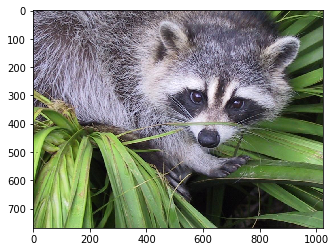

In [58]:
from scipy import misc
f = misc.face()

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [10]:
image_tab = np.array(f)
image_tab.shape
image_tab.dtype

(768, 1024, 3)

dtype('uint8')

# Exercice 1

## 1) Extraire une couleur

In [11]:
def image_rouge_gris(image_tab):
    return image_tab[:, :, 0]

(768, 1024)

dtype('uint8')

Text(0.5, 1.0, 'Rouge')

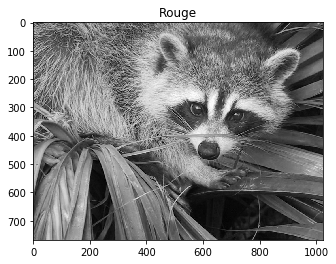

In [16]:
image_tab_rouge = image_rouge_gris(image_tab)
image_tab_rouge.shape
image_tab_rouge.dtype

plt.imshow(image_tab_rouge, cmap='gray')
plt.title("Rouge")

## Bonus : les deux autres couleurs

Text(0.5, 1.0, 'Vert')

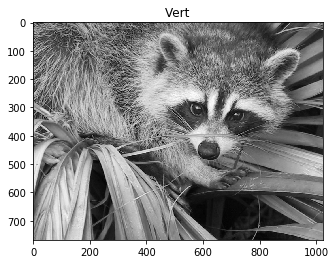

In [17]:
plt.imshow(image_tab[:,:,1], cmap='gray')
plt.title("Vert")

Text(0.5, 1.0, 'Bleu')

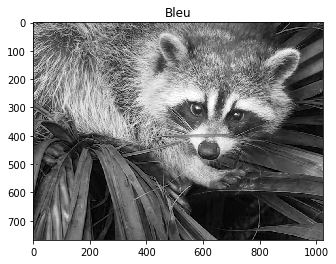

In [18]:
plt.imshow(image_tab[:,:,2], cmap='gray')
plt.title("Bleu")

## 2) Ne garder qu'une couleur

In [24]:
def image_rouge(image_tab):
    image_tab_rouge = image_tab[:, :, 0]
    x, y = np.shape(image_tab_rouge)
    dims_3couleurs = (x, y, 3)
    image_tab_3couleurs = np.zeros(dims_3couleurs, dtype=np.uint8)
    image_tab_3couleurs[:, :, 0] = image_tab_rouge
    return image_tab_3couleurs

(768, 1024, 3)

dtype('uint8')

Text(0.5, 1.0, 'Rouge')

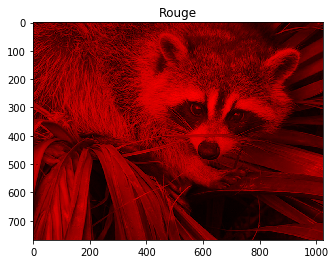

In [25]:
image_tab_3couleurs = image_rouge(image_tab)
image_tab_3couleurs.shape
image_tab_3couleurs.dtype

plt.imshow(image_tab_3couleurs)
plt.title("Rouge")

# Exercice 2

In [26]:
def rotation_90degres(image_tab):
    x, y, c = np.shape(image_tab)
    image_tab_90degres = np.zeros((y, x, c), dtype=np.uint8)
    for i in range(x):
        for j in range(y):
            image_tab_90degres[j, i, :] = image_tab[i, j, :]
    # on peut aussi faire
    # for k in range(c):
    #     image_tab_90degres[:, :, c] = np.transpose(image_tab[:, :, c])
    return image_tab_90degres

(1024, 768, 3)

Text(0.5, 1.0, 'Rotation 90 degres')

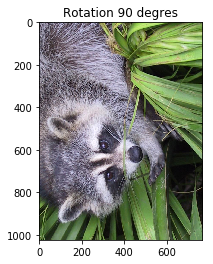

In [29]:
image_tab_90degres = rotation_90degres(image_tab)
image_tab_90degres.shape

plt.imshow(image_tab_90degres)
plt.title("Rotation 90 degres")

# Exercice 3

## 1) Agrandissement

In [30]:
def agrandissement(image_tab):
    x, y, c = np.shape(image_tab)
    image_tab_2fois = np.zeros((2*x, 2*y, c), dtype=np.uint8)
    for i in range(x):
        for j in range(y):
            image_tab_2fois[2*i, 2*j, :] = image_tab[i, j, :]
            image_tab_2fois[2*i, 2*j+1, :] = image_tab[i, j, :]
            image_tab_2fois[2*i+1, 2*j, :] = image_tab[i, j, :]
            image_tab_2fois[2*i+1, 2*j+1, :] = image_tab[i, j, :]
    return image_tab_2fois

(1536, 2048, 3)

Text(0.5, 1.0, 'Agrandissement 2 fois')

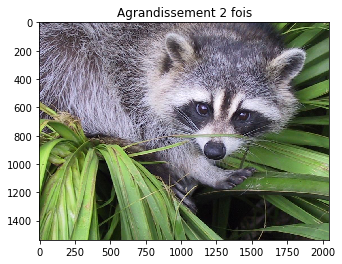

In [31]:
image_tab_2fois = agrandissement(image_tab)
image_tab_2fois.shape

plt.imshow(image_tab_2fois)
plt.title("Agrandissement 2 fois")

## 1) Réduction

In [55]:
def reduction(image_tab):
    x, y, c = np.shape(image_tab)
    image_tab_0_5fois = np.zeros((x//2, y//2, c), dtype=np.uint8)
    for i in range(x//2):
        for j in range(y//2):
            image_tab_0_5fois[i, j, :] = (
                  image_tab[2*i, 2*j, :]
                + image_tab[2*i+1, 2*j, :]
                + image_tab[2*i, 2*j+1, :]
                + image_tab[2*i+1, 2*j+1, :]
            ) // 4
    return image_tab_0_5fois

(384, 512, 3)

Text(0.5, 1.0, 'Réduction 2 fois')

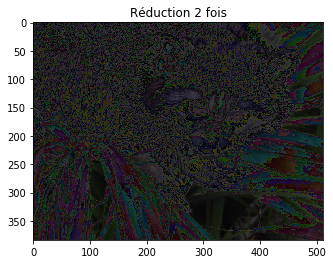

In [56]:
image_tab_0_5fois = reduction(image_tab)
image_tab_0_5fois.shape

plt.imshow(image_tab_0_5fois, cmap="gray")
plt.title("Réduction 2 fois")

(768, 1024, 3)

Text(0.5, 1.0, "Réduction 2 fois suivi d'un agrandissement 2 fois")

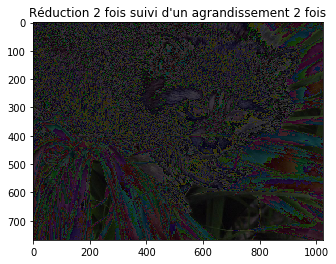

In [57]:
image_tab_prime = agrandissement(image_tab_0_5fois)
image_tab_prime.shape

plt.imshow(image_tab_prime)
plt.title("Réduction 2 fois suivi d'un agrandissement 2 fois")